<img src="Project_Analyzing_Kickstarter_Projects/kickstarter.png" style="display:block; margin:auto" width=350>

<div align="center"> <h1 align="center"> Project: Analyzing Kickstarter Projects </h1> </div>

#### The Goal
In the context of this project, we. take on the role of a data analyst at a startup. The product team is considering launching a campaign on Kickstarter to test the viability of some offerings. Our task is to pull data that will help the team understand what might influence the success of a campaign. In addition to addressing the specified questions below, a supplementary objective of this project is to demonstrate proficiency in basic `SQL`, underscored by data analysis skills employing `Python`.

Concretely, we try to unravel the answer to the following question:

- What types of projects are most likely to be successful?
- Which projects fail?
  
#### The Data
The data source is a selection of fields from  [Kaggle](https://www.kaggle.com/datasets/kemical/kickstarter-projects). Below are the definitions of the used columns in this data:

- `ID`: Unique identifier for Kickstarter projects
- `name`: Name of project
- `category`: Category of project
- `main_category`: Main category of project
- `goal`: Fundraising goal
- `pledged`: Amount pledged
- `state`: Current status of the project (e.g., successful, canceled)
- `backers`: Number of individuals supporting the project

#### Use SQL in Jupyter Notebook
Before delving into the analysis, let's first highlight the advantages behind incorporating `SQL` into `Jupyter Notebook`. `SQL` serves as a powerful language for interacting with `relational databases`, many data scientists work with SQL regularly. The integration of `SQL` in `Jupyter Notebook` offers several advantages:

- `Query and Manipulate Data`: Conduct direct data querying and manipulation within the notebook environment.
- `Facilitate Sharing`: Effortlessly share `SQL` queries and outcomes with others by exporting the notebook as a `PDF` or `HTML` file.
- `Integration with Python Code`: Combine `SQL` queries seamlessly with `Python` code to create more complex analyses and visualizations.

To integrate `SQL` in `Jupyter Notebook`, we installed the widely used `SQL` kernel, `IPython-SQL`, via the Anaconda terminal using the command `pip install ipython-sql`. Once the kernel is installed, initiation involves loading the `SQL` extension with the command `%load_ext sql`.

Now let's start the project!

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

#### Retrieving Column Data Types

The initial phase in engaging with a database involves acquiring a comprehensive understanding of the data within it. This database consists of one table, `ksprojects`.

In [1]:
# Load the SQL extension
%load_ext sql

# Initiate the database
%sql sqlite:///ksprojects.db

# Load python packages
import matplotlib.pyplot as plt

In [2]:
# List the names and data types for the specific table in the database. 
%sql PRAGMA table_info(ksprojects)

 * sqlite:///ksprojects.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,0
1,name,TEXT,0,None,0
2,category,TEXT,0,None,0
3,main_category,TEXT,0,None,0
4,goal,REAL,0,None,0
5,pledged,REAL,0,None,0
6,state,TEXT,0,None,0
7,backers,INTEGER,0,None,0


Above, we have employed the `PRAGMA table_info()` command to visualize the columns of the `ksprojects` table. This command provides comprehensive information about the structure of the columns within our dataset, explained as follows:

- `cid`: Gives the Index ID of every column
- `name`: Column name
- `type`: Column type
- `notnull`: Has a NOT NULL constraint
- `dflt_value`:	Default value
- `pk`: Is part of the Primary Key

#### Initial Selection of Rows and Columns

To start, even a database with one table likely contains data that's not necessary to our analysis. In this step, we'll specify which columns to read from the table.

In the initial phase, even a database featuring one table may contain unnecessary data for our analytical objectives. In this stage, we'll specify which columns to read from the table.





In [3]:
%%sql 
SELECT main_category, goal, backers, pledged
  FROM ksprojects
 LIMIT 10;

 * sqlite:///ksprojects.db
Done.


main_category,goal,backers,pledged
Publishing,1000.0,0,0.0
Film & Video,30000.0,15,2421.0
Film & Video,45000.0,3,220.0
Music,5000.0,1,1.0
Film & Video,19500.0,14,1283.0
Food,50000.0,224,52375.0
Food,1000.0,16,1205.0
Food,25000.0,40,453.0
Design,125000.0,58,8233.0
Film & Video,65000.0,43,6240.57


#### Filtering by Category

To answer our initial questions, *"What types of projects are most likely to be successful?"* and *"Which projects fail?"*, we queried the output above.  Having identified the relevant columns, our next step involves refining the dataset by including only those falling within specific categories. 

In the spirit of `Thomas Edison`, who said, *"I have not failed. I've just found 10,000 ways that won't work,"* the product team expresses interest in gaining insights into projects that weren't successful. Therefore, we will filter the data for projects, where the state is either `failed`, `canceled` or `suspended`.

In [4]:
%%sql
SELECT main_category, goal, backers, pledged
  FROM ksprojects
 WHERE state IN ('failed', 'canceled', 'suspended')
 LIMIT 10;

 * sqlite:///ksprojects.db
Done.


main_category,goal,backers,pledged
Publishing,1000.0,0,0.0
Film & Video,30000.0,15,2421.0
Film & Video,45000.0,3,220.0
Music,5000.0,1,1.0
Film & Video,19500.0,14,1283.0
Food,25000.0,40,453.0
Design,125000.0,58,8233.0
Film & Video,65000.0,43,6240.57
Publishing,2500.0,0,0.0
Crafts,5000.0,0,0.0


#### Filtering by Quantity

For the purpose of our analysis, we aim to focus exclusively on projects of a specific size. This filtering is necessary, as the database contains numerous small-scale projects that aren't relevant to our analysis. Having successfully filtered our records based on certain categories, our next step involves additional filtering to meet specified quantity criteria. In detail, we will filter the data based on the number of `backers` and the number of money `pledged`.






In [5]:
%%sql
SELECT main_category, backers, pledged, goal
 FROM ksprojects
WHERE state IN ('failed', 'canceled', 'suspended') AND backers >= 100 AND pledged >= 20000
LIMIT 10;

 * sqlite:///ksprojects.db
Done.


main_category,backers,pledged,goal
Technology,120,90771.0,250000.0
Design,647,39693.0,25000.0
Technology,103,61416.0,5000.0
Art,257,50230.0,100000.0
Film & Video,135,23098.0,150000.0
Film & Video,189,20677.0,50000.0
Film & Video,118,25877.0,100000.0
Technology,108,45687.01,60000.0
Technology,209,33916.0,50000.0
Technology,310,85017.0,96485.0


#### Ordering Results

Beyond the selection of the relevant columns and the application of row filters, sorting your results is a valuable strategy for enhancing data comprehension. In the current context, the product team expresses interest in organizing projects based on categories, along with the corresponding percentage of the funding goal achieved. 

Therefore, we will develop the `SQL` query before and add the `ORDER BY` command. On top of that, we create a new column consisting of the amount `pledged` divided by the pledge `goal`, calling it `pct_pledged`. And we'll filter the data just by `failed` projects.






In [6]:
%%sql
SELECT main_category, backers, pledged, goal, ROUND((pledged/goal), 2) AS pct_pledged
  FROM ksprojects
 WHERE state IN ('failed')
   AND backers >= 100 AND pledged >= 20000
 ORDER BY main_category, pct_pledged DESC
 LIMIT 10;

 * sqlite:///ksprojects.db
Done.


main_category,backers,pledged,goal,pct_pledged
Art,315,49191.0,50000.0,0.98
Art,294,52565.25,60000.0,0.88
Art,172,21310.0,25000.0,0.85
Art,185,27630.24,35000.0,0.79
Art,552,37621.97,50000.0,0.75
Art,159,31657.0,45000.0,0.7
Art,336,33485.0,52000.0,0.64
Art,130,20374.99,35000.0,0.58
Art,133,54387.0,100000.0,0.54
Art,257,50230.0,100000.0,0.5


#### Conditional Logic: Failed Projects

Effectively understanding a dataset often involves categorizing records based on specific conditions, which can be done with `CASE` statements in `SQL`. Although exploring metrics like the number of `backers` for unsuccessful projects is insightful, the critical determinant for the success of a `Kickstarter` project lies in its ability to achieve the `pledged funding goal`.

In [7]:
%%sql
SELECT main_category, backers, pledged, goal,
         ROUND((pledged / goal), 2) AS pct_pledged,
         CASE
            WHEN pledged / goal >= 1 THEN 'Fully funded'
            WHEN pledged / goal BETWEEN .75 AND 1 THEN 'Nearly funded'
            WHEN pledged / goal < .75 THEN 'Not nearly funded'
         END AS funding_status
  FROM ksprojects
 WHERE state IN ('failed') AND backers >= 100 AND pledged >= 20000
 ORDER BY main_category, pct_pledged DESC
 LIMIT 10;

 * sqlite:///ksprojects.db
Done.


main_category,backers,pledged,goal,pct_pledged,funding_status
Art,315,49191.0,50000.0,0.98,Nearly funded
Art,294,52565.25,60000.0,0.88,Nearly funded
Art,172,21310.0,25000.0,0.85,Nearly funded
Art,185,27630.24,35000.0,0.79,Nearly funded
Art,552,37621.97,50000.0,0.75,Nearly funded
Art,159,31657.0,45000.0,0.7,Not nearly funded
Art,336,33485.0,52000.0,0.64,Not nearly funded
Art,130,20374.99,35000.0,0.58,Not nearly funded
Art,133,54387.0,100000.0,0.54,Not nearly funded
Art,257,50230.0,100000.0,0.5,Not nearly funded


These projects attracted a substantial number of `backers`, with some approaching their `funding goal` closely. However, it's noteworthy that certain projects, despite garnering a commendable number of backers, set ambitious funding goals and therefore failed to succeed the campaign. 

In summary, a balanced approach is crucial, where the `funding goal` is reasonable, and `backers` contribute a significant amount, avoiding a reliance on minimal `pledges`, such as 5€ contributions.

#### Succesfull Projects

Now lets look at successfull `Kickstarter` projects where the amount of `backers` is categorize in three distinct groups: 

- `small audience`: 50 or less `backers`
- `medium audience`: 51 to 150 `backers`
- `big audience`: more then 151 `backers`

We will sort the output in ascending order, resulting in showing us the lower end of successful projects.

In [8]:
%%sql
SELECT category, state, backers, 
       ROUND((pledged / goal), 2) * 100 AS pct_pledged,
            CASE 
                WHEN backers <= 50 THEN 'small audience'
                WHEN backers BETWEEN 51 AND 150 THEN 'medium audience'
                WHEN backers > 151 THEN 'big audience'
            END AS audience_size
  FROM ksprojects
 WHERE state IN ('successful')
 ORDER BY pct_pledged
 LIMIT 10;

 * sqlite:///ksprojects.db
Done.


category,state,backers,pct_pledged,audience_size
Shorts,successful,275,85.0,big audience
Music,successful,7,100.0,small audience
Product Design,successful,18,100.0,small audience
Music,successful,34,100.0,small audience
Publishing,successful,26,100.0,small audience
Dance,successful,21,100.0,small audience
Fabrication Tools,successful,57,100.0,medium audience
Photography,successful,20,100.0,small audience
Drinks,successful,145,100.0,medium audience
Comedy,successful,192,100.0,big audience


The output gives us, among other things, the following insight:

- The successful project with the lowest pledged percentage is a project in the `Shorts` with 85% pledged.
- In the lower end of the successful projects are five projects with `small audience`, four with `medium sized audience` and just one with a `big audience`.
- There are seven different `categories` among the lower ten successful projects.

#### What types of projects are most likely to be successful?

Lets try to answer the question, which projects are most likely to be successful. To do this, we will group the data set by category so that we can see which categories of successful projects had the most supporters and how much was donated to them in total.

In [9]:
%%sql
SELECT category, state, backers,
       ROUND((pledged / goal) * 100, 2) AS pct_pledged, goal, pledged
  FROM ksprojects
 WHERE state IN ('successful')
 GROUP BY category
 ORDER BY backers DESC
 LIMIT 10;

 * sqlite:///ksprojects.db
Done.


category,state,backers,pct_pledged,goal,pledged
Software,successful,3080,117.64,40000.0,47056.86
Drinks,successful,2784,833.32,15000.0,124998.0
Gadgets,successful,2412,1321.0,30000.0,396299.0
Sound,successful,2278,910.69,25000.0,227673.0
Cookbooks,successful,1261,236.37,20000.0,47273.0
Periodicals,successful,931,111.12,35000.0,38890.36
Animation,successful,840,115.15,50000.0,57577.31
Typography,successful,761,171.7,12000.0,20604.02
Tabletop Games,successful,761,1883.5,5000.0,94175.0
Academic,successful,719,506.53,10000.0,50653.0


As we can see in the graph above, the `Software` category generated the most `Backers`, followed by the `Drinks` and `gadgets` categories. In the category with the most `backers`, the overall donation target was exceeded by around 18% across all successful software projects. 

The categories with the second and third most `bakers`, `Drinks` and `Gadgets`, achieve even higher values. The successful projects in `Drinks` exceeded the target values by a total of 833% and the successful projects in `Gadgets` exceeded the target donation goals by a total of 1321%. In monetary terms, for the latter category this would be a total goal of all successful projects of `$30,000` and a total achieved value of `$396,299`.

A project in these categories would therefore be very promising and would have the potential to attract a large audience and reach many backers. Nevertheless, it must be noted that this data set only consists of successful projects, another useful indicator would be the ratio of successful to unsuccessful projects per category.

To do this, will transform SQL table into a pandas dataframe.

In [10]:
# Save the SQL output to data
data = %sql SELECT category, state, backers, (pledged / goal) * 100 AS pct_pledged FROM ksprojects WHERE state IN ('successful', 'failed')

 * sqlite:///ksprojects.db
Done.


In [11]:
# Transform the data to pandas dataframe
ksprojects_df = data.DataFrame()

# Check the columns and general information about the dataframe
ksprojects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     331675 non-null  object 
 1   state        331675 non-null  object 
 2   backers      331675 non-null  int64  
 3   pct_pledged  331675 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ MB


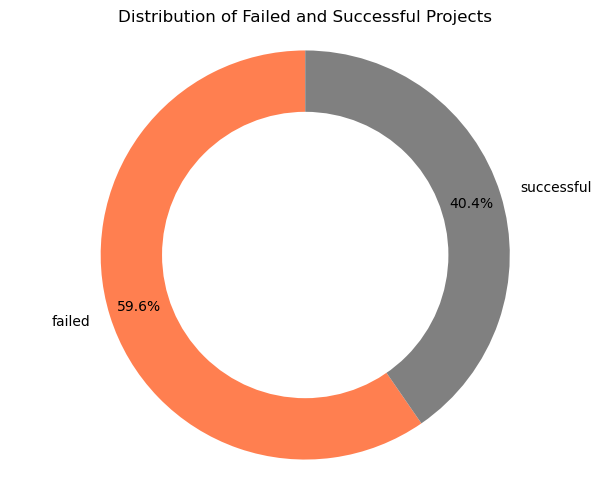

In [12]:
# Create a pie chart based on the value counts of state column
fig1, ax = plt.subplots()
ax = ksprojects_df['state'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['coral', 'grey'], startangle=90, pctdistance=0.85)

# Ajust circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title('Distribution of Failed and Successful Projects')
plt.ylabel('')

plt.show()

Examining the distribution of projects categorized as `failed` and `successful` above, it is evident that approximately 60% of the projects faced failure, while 40% achieved success. To gain deeper insights, we will further investigate the three pre-identified categories with potential for successful project outcomes: `Software`, `Drinks` and `Gadgets`.





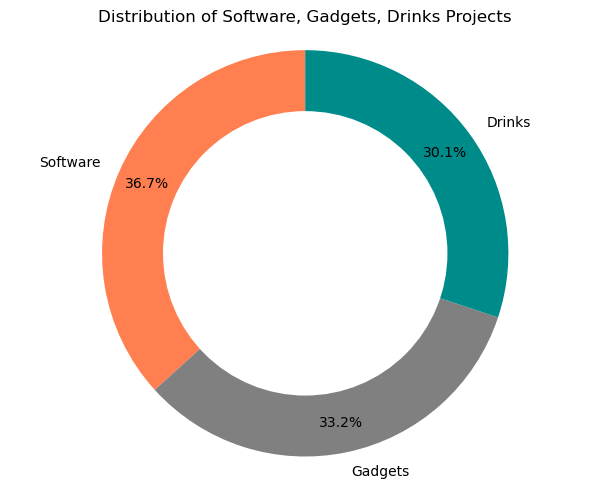

In [13]:
# Filter the dataframe for three categories, safe to new dataframe 'best_cat'
best_cat = ksprojects_df[(ksprojects_df['category'] == 'Software') | (ksprojects_df['category'] == 
                                                         'Drinks') | (ksprojects_df['category'] == 'Gadgets')]

# Create a pie chart for the three categories
fig1, ax = plt.subplots()
ax = best_cat['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                              colors=['coral', 'grey', 'darkcyan'], startangle=90, pctdistance=0.85)
# Ajust circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title('Distribution of Software, Gadgets, Drinks Projects')
plt.ylabel('')

plt.show()

In the preceding steps, we initiated the filtering of the dataframe and generated a pie chart. Analyzing the chart reveals a relatively balanced distribution among the three categories: `Software` comprises approximately 37%, `Gadgets` 33%, and `Drinks` 30%. Our next objective is to delve into the success-failure ratio within each category.





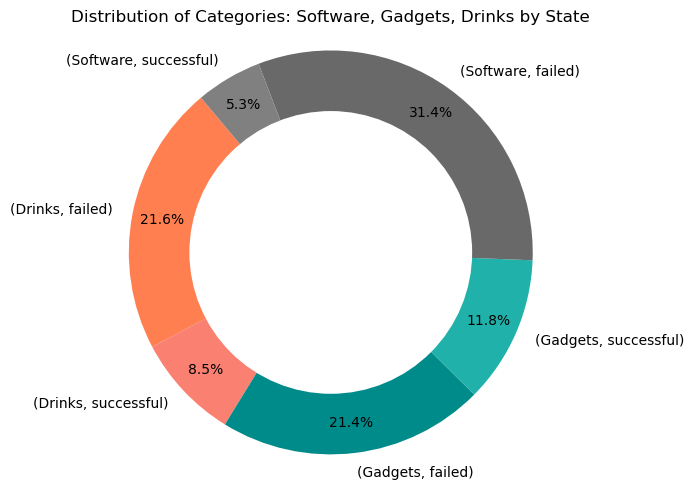

In [14]:
# Group the data by category and count the values for every state, create a pie chart
fig1, ax = plt.subplots()
best_cat.groupby('category')['state'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                                          colors=['coral', 'salmon', 'darkcyan', 'lightseagreen', 'dimgrey', 'grey'], 
                                                          startangle=130, pctdistance=0.85)

# Ajust circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title('Distribution of Categories: Software, Gadgets, Drinks by State')
plt.ylabel('')
plt.show()

Upon examination, it becomes evident that the category `Software`, which had the highest number of `backers`, yet only a limited subset of these projects achieved success. Interestingly, the category `Gadgets` exhibits the most favorable success-failure ratio among the top three categories by `backers` count, concurrently holding the highest percentage of pledged funds. Consequently, considering these factors, projects related to `Gadgets` emerge as notably successful within the dataset.









#### Games Category

Now our focus is on the `Games` category, let's examine the number of `backers` this category attracts and explore the success-failure ratio for projects within this specific category.





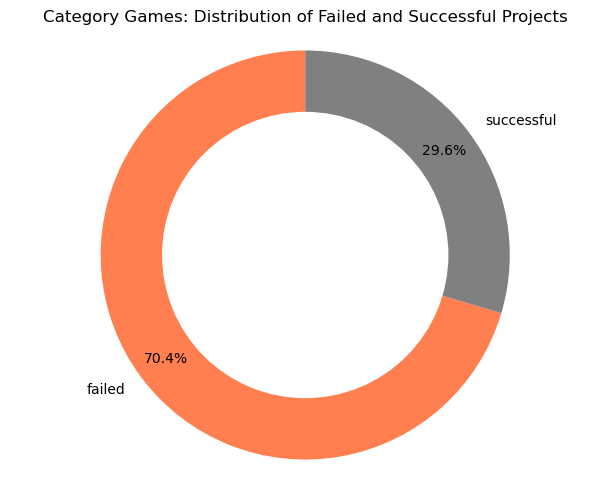

In [15]:
# Filter for games category
games_df = ksprojects_df[ksprojects_df['category'] == 'Games']

# Create pie chart
fig1, ax = plt.subplots()
games_df['state'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                      colors=['coral', 'grey'], startangle=90, pctdistance=0.85)


# Ajust circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title('Category Games: Distribution of Failed and Successful Projects')
plt.ylabel('')

plt.show()

The success-failure ratio of projects in the `Games` category is skewed towards failure, with over two-thirds of the projects ending in failure. Now let's examine the count of `backers` differentiated by `state`.

In [16]:
# Group by state and calculate mean backer count 
games_df.groupby('state')['backers'].mean()

state
failed         13.882956
successful    296.920411
Name: backers, dtype: float64

In the event of a failed project in the `Games` category, the average number of `backers` is merely 14. Conversely, for successful projects in this category, the mean `backer` count significantly increases to 297. This notable difference suggests that achieving a successful campaign in the `games` category is associated with attaining a `backer` count around the category mean.





#### Conclusion

In conclusion, this project involved a comprehensive analysis of `Kickstarter` data sourced from `Kaggle`. Utilizing `Jupyter Notebook`, we seamlessly integrated `SQL` queries and `Python`. Key findings revealed insights into project success and failure rates, with a focus on categories such as `Software`, `Drinks`, and '`Gadgets`. The examination of `backer` counts in the `Games` category shed light on success-failure ratios, emphasizing the importance of achieving a `backer` count around the category mean for a successful campaign. This integrated approach gave a first impression of the power of combining `SQL` and `Python` within the `Jupyter Notebook` environment for effective and insightful data analysis.